In [1]:
# build a network to classify Reuters newswires into 46 mutually exclusive topics.
# single label, multiclass classification

In [2]:
from keras.datasets import reuters


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [6]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results


one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

2022-07-20 13:07:27.938739: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-20 13:07:27.942700: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 48ms/step - loss: 2.7441 - accuracy: 0.5519 - val_loss: 1.9593 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 1s 34ms/step - loss: 1.5842 - accuracy: 0.7154 - val_loss: 1.4189 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 28ms/step - loss: 1.1292 - accuracy: 0.7798 - val_loss: 1.1741 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.8655 - accuracy: 0.8297 - val_loss: 1.0372 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 25ms/step - loss: 0.6904 - accuracy: 0.8652 - val_loss: 0.9575 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 0.5609 - accuracy: 0.8953 - val_loss: 0.9097 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.4619 - accuracy: 0.9083 - val_loss: 0.8689 - val_accuracy: 0.8190
Epoch 8/20
16

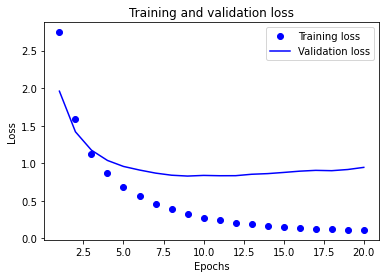

In [17]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

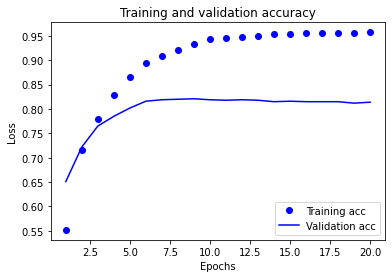

In [19]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 37ms/step - loss: 0.1067 - accuracy: 0.9573 - val_loss: 0.9819 - val_accuracy: 0.8070
Epoch 2/9
16/16 [==============================] - 0s 28ms/step - loss: 0.1039 - accuracy: 0.9575 - val_loss: 0.9680 - val_accuracy: 0.8100
Epoch 3/9
16/16 [==============================] - 0s 25ms/step - loss: 0.1000 - accuracy: 0.9570 - val_loss: 0.9703 - val_accuracy: 0.8100
Epoch 4/9
16/16 [==============================] - 0s 25ms/step - loss: 0.0983 - accuracy: 0.9567 - val_loss: 0.9967 - val_accuracy: 0.8060
Epoch 5/9
16/16 [==============================] - 0s 26ms/step - loss: 0.0967 - accuracy: 0.9577 - val_loss: 0.9993 - val_accuracy: 0.8070
Epoch 6/9
16/16 [==============================] - 0s 26ms/step - loss: 0.0937 - accuracy: 0.9585 - val_loss: 1.0268 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 1s 32ms/step - loss: 0.0923 - accuracy: 0.9564 - val_loss: 1.0380 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [21]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 1s 19ms/step - loss: 1.2185 - accuracy: 0.7912


In [22]:
print(results)

[1.2185437679290771, 0.7911843061447144]


In [23]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 5ms/step


In [24]:
print(predictions[0])

[3.99542341e-06 9.81793437e-06 6.64472793e-07 9.48071003e-01
 5.08266315e-02 2.82585297e-08 3.84920078e-08 2.34577965e-06
 1.49642612e-04 6.12447866e-06 2.40768350e-05 7.82245479e-05
 8.96772633e-07 2.71492190e-05 4.99168152e-07 1.48944101e-08
 6.20080755e-05 1.11477937e-06 4.14982082e-07 5.10341604e-04
 1.21173987e-04 3.80316487e-05 8.70694663e-08 1.44142007e-06
 3.02716359e-07 2.48891456e-06 4.05862988e-09 4.66405830e-08
 7.84056510e-07 2.64743812e-06 1.14660315e-05 1.64217067e-08
 8.13632198e-07 4.43872565e-08 1.69717566e-06 2.61826301e-07
 3.47752830e-05 3.19953756e-06 1.59927390e-06 2.21559594e-06
 4.42171853e-07 6.90165223e-07 3.10417092e-09 7.16962916e-08
 4.88551033e-10 5.84397640e-07]
